# Intrinsic Intrinsic properties - Clustering with Dendrogram

<img src='images/Cluster_eg.PNG' alt='Drawing' style="width: 350px;"/>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/Project_datasets/intrinsic_cluster_analysis.csv")
cleaned_data = data.drop(['Unnamed: 0'], axis = 1) #drop unwanted columns
cleaned_data.rename(columns={'Unnamed: 6':'Putative Cell Type'}, inplace=True) #Rename Column with putative cell type
cleaned_data.loc[0:16, 'Putative Cell Type'] = 'VIP+'
cleaned_data.loc[17:45, 'Putative Cell Type'] = 'NDNF-Like'
cleaned_data.loc[46:, 'Putative Cell Type'] = 'Jini Cells'
print(cleaned_data.info())
cleaned_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Delay               67 non-null     float64
 1   Rheobase            67 non-null     float64
 2   Rin                 67 non-null     float64
 3   tau                 67 non-null     float64
 4   Max                 67 non-null     float64
 5   Putative Cell Type  67 non-null     object 
dtypes: float64(5), object(1)
memory usage: 3.3+ KB
None


,Delay,Rheobase,Rin,tau,Max,Putative Cell Type
0,27.90,75.8,258.000,12.3000,143.0,VIP+
1,331.90,44.8,412.000,13.4708,66.0,VIP+
2,134.80,36.0,536.500,23.9807,64.0,VIP+
3,176.80,26.6,692.000,27.1597,25.0,VIP+
4,41.42,104.0,318.632,13.0589,30.0,VIP+


In [2]:
df = cleaned_data
df.head()

,Delay,Rheobase,Rin,tau,Max,Putative Cell Type
0,27.90,75.8,258.000,12.3000,143.0,VIP+
1,331.90,44.8,412.000,13.4708,66.0,VIP+
2,134.80,36.0,536.500,23.9807,64.0,VIP+
3,176.80,26.6,692.000,27.1597,25.0,VIP+
4,41.42,104.0,318.632,13.0589,30.0,VIP+


In [3]:
df.set_index('Putative Cell Type', inplace=True) #make putative cell type an index so as to not cause issues with dendrogram
df.head()

,Delay,Rheobase,Rin,tau,Max
Putative Cell Type,,,,,
VIP+,27.90,75.8,258.000,12.3000,143.0
VIP+,331.90,44.8,412.000,13.4708,66.0
VIP+,134.80,36.0,536.500,23.9807,64.0
VIP+,176.80,26.6,692.000,27.1597,25.0
VIP+,41.42,104.0,318.632,13.0589,30.0


### Agglomerative Hierarchical Clustering with Sci-kit Learn

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df) 
print (labels)

[0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
from scipy.cluster import hierarchy

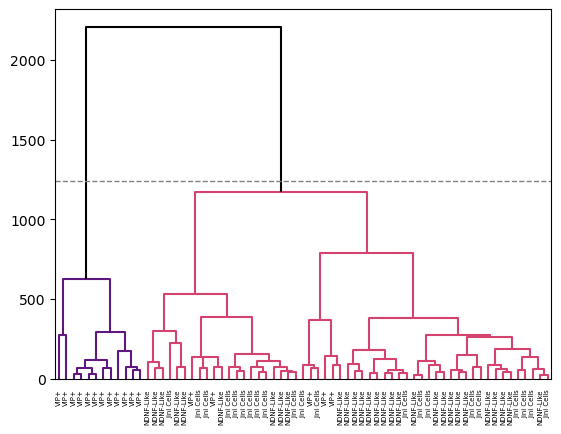

In [18]:
linkage_data = linkage(df, method='ward', metric='euclidean')
hierarchy.set_link_color_palette(['#5f187f','#d3436e'])

dendrogram(linkage_data, leaf_font_size=5, labels=df.index, color_threshold=1240, above_threshold_color='black')
plt.axhline(y=1240, c='grey', lw=1, linestyle='dashed')
plt.show()

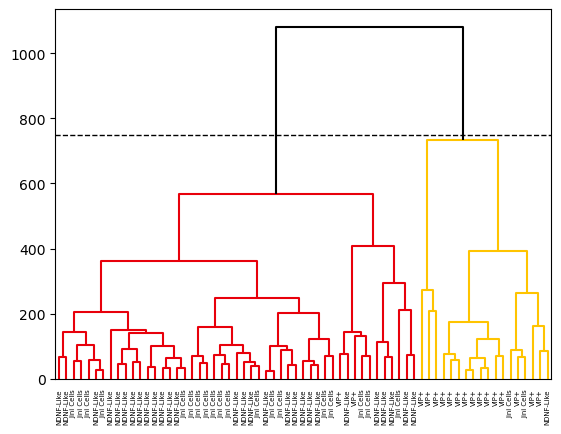

In [23]:
linkage_complete = linkage(df, method='complete', metric='euclidean')
hierarchy.set_link_color_palette(['#e8000b','#ffc400'])

dendrogram(linkage_complete, leaf_font_size=5, labels=df.index, color_threshold=750, above_threshold_color='black')
plt.axhline(y=750, c='black', lw=1, linestyle='dashed')
plt.show()

pal = sns.color_palette('bright')
print (pal.as_hex())
pal.as_hex()

In [24]:
cleaned_data.reset_index(inplace=True) #reset index

In [25]:
df_concat = pd.concat([cleaned_data, pd.DataFrame(labels, columns =['dendrogram_ncluster_2'])], axis=1)
df_concat['dendrogram_ncluster_2'].replace({0:'NDNF-like', 1:'VIP+'}, inplace = True)
df_concat.head()

,Putative Cell Type,Delay,Rheobase,Rin,tau,Max,dendrogram_ncluster_2
0,VIP+,27.90,75.8,258.000,12.3000,143.0,NDNF-like
1,VIP+,331.90,44.8,412.000,13.4708,66.0,NDNF-like
2,VIP+,134.80,36.0,536.500,23.9807,64.0,NDNF-like
3,VIP+,176.80,26.6,692.000,27.1597,25.0,VIP+
4,VIP+,41.42,104.0,318.632,13.0589,30.0,NDNF-like
